# Isochrones

Some useful resources:

https://thechronos.readthedocs.io/en/latest/

PARSEC Isochrone website
http://stev.oapd.inaf.it/cmd

Packages you need to pip install:
* chronos (pip install thechronos)

Files you will need:
* isochrone_data.zip

In [1]:
# imports
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.table import Table
from dlnpyutils import coords
from chronos import chronos
from astropy.io import fits
%matplotlib inline

ModuleNotFoundError: No module named 'dlnpyutils'

# Isochrone Fitting

Load the NGC104 Gaia EDR3 photometry. A proper motion cut has been applied to try to remove non-cluster stars in the foreground.


In [ ]:
# Load the NGC104 Gaia EDR3 photometry
# A proper motion
data = fits.getdata('data/NGC104_photometry.fits')

Make the color-magnitude diagram.  GMAG vs. BP-RP

In [2]:
fig = plt.figure(figsize=(8,8))
plt.scatter(data['BP']-data['RP'],data['GMAG'],s=1)
plt.xlabel('BP-RP')
plt.ylabel('GMAG')
plt.title('NGC104 Gaia EDR3 Photometry')
plt.xlim(-1,3.5)
plt.ylim(22,10)

NameError: name 'data' is not defined

<Figure size 576x576 with 0 Axes>

In [3]:
font = { 'size'   : 13}
mpl.rc('font', **font)
fig = plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(10,10))
plt.hist2d(data['BP']-data['RP'],data['GMAG'],bins=(200,200),norm = mpl.colors.LogNorm(),cmap='gray_r')
plt.colorbar(label='N stars')
plt.xlabel('BP-RP')
plt.ylabel('GMAG')
plt.title('NGC104 Gaia EDR3 Photometry')
plt.xlim(-1,3.5)
plt.ylim(22,10)
plt.savefig('NGC104_cmd.png')

NameError: name 'data' is not defined

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [18]:
ls data

 Volume in drive C is OS
 Volume Serial Number is 4E89-5B0C

 Directory of C:\Users\WillsPc\GitHub\ObservationalAstro_PHSX491\inclass_activities\data

11/09/2021  09:44 AM    <DIR>          .
11/09/2021  09:44 AM    <DIR>          ..
10/12/2021  08:42 AM        73,512,000 DoubleCluster-0023B_red.fit
10/28/2021  08:32 AM         3,712,320 g_all_chip1.fit
11/09/2021  09:44 AM            46,080 isochrone_10Gyr_mh-0.5.fits
11/09/2021  09:44 AM            46,080 isochrone_10Gyr_mh-1.5.fits
11/09/2021  09:44 AM            57,600 isochrone_1Gyr_mh-0.5.fits
11/09/2021  09:44 AM            48,960 isochrone_1Gyr_mh-1.5.fits
11/09/2021  09:44 AM            51,840 isochrone_5Gyr_mh-0.5.fits
11/09/2021  09:44 AM            46,080 isochrone_5Gyr_mh-1.5.fits
11/09/2021  09:44 AM         9,031,680 NGC104_photometry.fits
               9 File(s)     86,552,640 bytes
               2 Dir(s)  339,393,011,712 bytes free


In [70]:
name1 = 'isochrone_10Gyr_mh-0.5.fits'
name2 = 'isochrone_10Gyr_mh-1.5.fits'
name3 = 'isochrone_1Gyr_mh-0.5.fits'
name4 = 'isochrone_1Gyr_mh-1.5.fits'
name5 = 'isochrone_5Gyr_mh-0.5.fits'
name6 = 'isochrone_5Gyr_mh-1.5.fits'
name_list = [name1, name2, name3, name4, name5, name6]
iso_list = []
for name in name_list:
    iso_list.append(fits.getdata('data/'+name))
    
Table(iso_list[0])

ZINI,MH,LOGAGE,MINI,INT_IMF,MASS,LOGL,LOGTE,LOGG,LABEL,MCORETP,C_O,PERIOD0,PERIOD1,PERIOD2,PERIOD3,PERIOD4,PMODE,MLOSS,TAU1M,X,Y,XC,XN,XO,CEXCESS,Z,MBOLMAG,GMAG,G_BPMAG,G_RPMAG
float64,float32,float32,float64,float64,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float64,float64,float64,float64,float64,float32,float64,float32,float32,float32,float32
0.0048313,-0.5,10.0,0.0900000036,1.0816895962,0.09,-3.325,3.4059,5.293,1,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-4.49e-17,0.0,0.7362,0.2589,0.0008868,0.0002392,0.00217,-1.0,0.004931,13.081,14.811,17.825,13.341
0.0048313,-0.5,10.0,0.1000000015,1.1711064577,0.1,-3.116,3.4357,5.248,1,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-7.24e-17,0.0,0.7355,0.2595,0.0008868,0.0002392,0.00217,-1.0,0.004931,12.559,14.1,16.717,12.683
0.0048313,-0.5,10.0,0.1199999973,1.3193154335,0.12,-2.848,3.468,5.189,1,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-1.31e-16,0.0,0.7344,0.2607,0.0008868,0.0002392,0.00217,-1.0,0.004931,11.889,13.114,15.133,11.799
0.0048313,-0.5,10.0,0.1218459085,1.331360817,0.122,-2.829,3.4699,5.185,1,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-1.37e-16,0.0,0.7343,0.2608,0.0008868,0.0002392,0.00217,-1.0,0.004931,11.843,13.049,15.035,11.741
0.0048313,-0.5,10.0,0.1400000006,1.4384527206,0.14,-2.662,3.4874,5.148,1,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-1.95e-16,0.0,0.7333,0.2618,0.0008868,0.0002392,0.00217,-1.0,0.004931,11.425,12.465,14.166,11.222
0.0048313,-0.5,10.0,0.1599999964,1.5372931957,0.16,-2.519,3.5006,5.115,1,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-2.64e-16,0.0,0.7324,0.2627,0.0008868,0.0002392,0.00217,-1.0,0.004931,11.067,11.992,13.512,10.799
0.0048313,-0.5,10.0,0.1999999881,1.6938791275,0.2,-2.296,3.5185,5.061,1,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-4.19e-16,0.0,0.731,0.2641,0.0008868,0.0002392,0.00217,-1.0,0.004931,10.511,11.292,12.611,10.165
0.0048313,-0.5,10.0,0.25,1.8403258324,0.25,-2.086,3.5324,5.004,1,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-5.73e-17,0.0,0.7302,0.2649,0.0008868,0.0002393,0.00217,-1.0,0.004931,9.985,10.67,11.868,9.59
0.0048313,-0.5,10.0,0.3000000119,1.9529139996,0.3,-1.923,3.542,4.958,1,0.0,0.545,0.0,0.0,0.0,0.0,0.0,-1,-3.29e-16,0.0,0.7301,0.265,0.0008868,0.0002393,0.00217,-1.0,0.004932,9.577,10.205,11.334,9.153


<font color='blue'>
    <h1>In-class Exercise:</h1>

1) Compare all six isochrones to the NGC104 data, vary distance modulus for each to find the best match.

</font>

<Figure size 720x720 with 0 Axes>

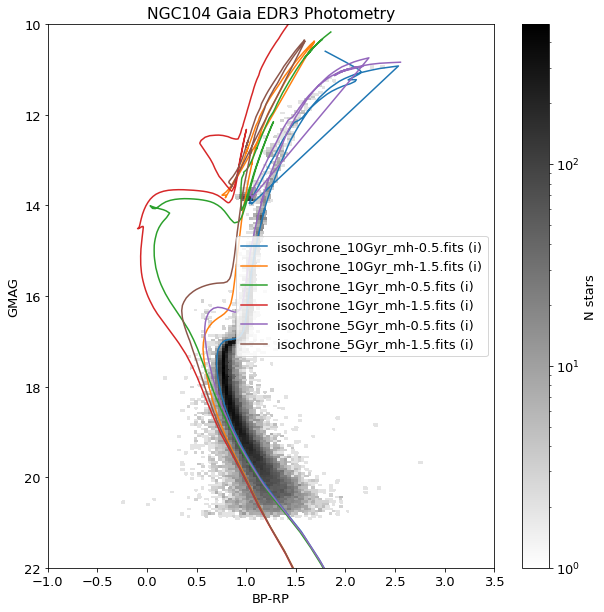

In [78]:
font = { 'size'   : 13}
mpl.rc('font', **font)
fig = plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(10,10))
plt.hist2d(data['BP']-data['RP'],data['GMAG'],bins=(200,200),norm = mpl.colors.LogNorm(),cmap='gray_r')
plt.colorbar(label='N stars')
for i in range(len(name_list)):
    plt.plot(iso_list[i]['G_BPMAG']-iso_list[i]['G_RPMAG'], iso_list[i]["GMAG"]+13.5, label=name_list[i] + f" (i)")

plt.legend()
plt.xlabel('BP-RP')
plt.ylabel('GMAG')
plt.title('NGC104 Gaia EDR3 Photometry')
plt.xlim(-1,3.5)
plt.ylim(22,10)
plt.savefig('NGC104_cmd.png')
plt.show()

<font color='blue'>
    <h1>In-class Exercise:</h1>

Now let's also vary extinction.

Extinction Coefficients:
    
- A(BP)/A(V) = 1.08337	

- A(RP)/A(V) = 0.63439

- A(GMAG)/A(V) = 0.83627	
    
1) Write a little function that dereddenes the photometry given a certain amount of A(V) extinction.
    
2) Redo the fitting but vary extinction as well.
    
    
</font>

In [93]:
def ext_coef(A, iso_list=iso_list, name_list=name_list):
    c_bp = 1.08337
    c_rp = 0.63439
    c_gmag = 0.83627
    for i in range(len(name_list)):
        plt.plot((iso_list[i]['G_BPMAG']+c_bp*A) -(iso_list[i]['G_RPMAG']+c_rp*A), (iso_list[i]["GMAG"]+13.5 + c_gmag*A), label=name_list[i] + f" ({i})")

<Figure size 720x720 with 0 Axes>

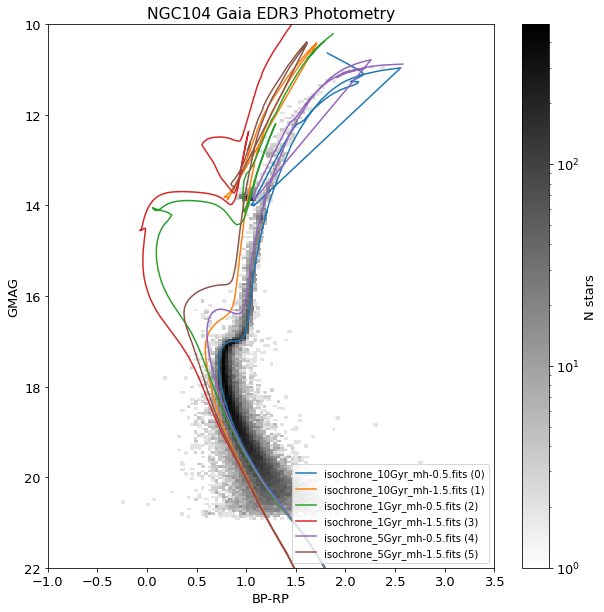

In [96]:
font = { 'size'   : 13}
mpl.rc('font', **font)
fig = plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(10,10))
plt.hist2d(data['BP']-data['RP'],data['GMAG'],bins=(200,200),norm = mpl.colors.LogNorm(),cmap='gray_r')
plt.colorbar(label='N stars')
ext_coef(0.05)

plt.legend(loc="lower right", fontsize=10)
plt.xlabel('BP-RP')
plt.ylabel('GMAG')
plt.title('NGC104 Gaia EDR3 Photometry')
plt.xlim(-1,3.5)
plt.ylim(22,10)
plt.savefig('NGC104_cmd.png')
plt.show()

<font color='blue'>
    <h1>In-class Exercise:</h1>

1) Use ``chronos.fit()`` to fit the isochrone.
2) Plot the data and best isochrone model on top.
</font>

In [105]:
catnames = ['BP','RP','GMAG']
#caterrnames = ['BPERR','RPERR','GERR']
isonames = ['GAIAEDR3_GBPMAG','GAIAEDR3_GRPMAG','GAIAEDR3_GMAG']
out,bestiso = chronos.fit(data,catnames=catnames,isonames=isonames,verbose=True,mcmc=True)

Fitting isochrones to catalog of 75190 sources
Photometry columns: BP, RP, GMAG
Isochrone columns: GAIAEDR3_GBPMAG, GAIAEDR3_GRPMAG, GAIAEDR3_GMAG
 
Performing grid search
 
Performing maximum likelihood estimation
Age    =  7400000000.00 +/- 116242245.573 years
Metal  =     -1.05 +/-  0.008 dex  
Extinction =      0.42 +/-  0.012      
Distmod =     13.49 +/-  0.021      
 
Running MCMC
MCMC values:
Age    =  6340042230.24 +/- 140630072.855 years
Metal  =     -1.29 +/-  0.059 dex  
Extinction =      0.60 +/-  0.033      
Distmod =     13.39 +/-  0.054      
 
Final parameters:
Age    =  6497856149.41 +/- 140630072.855 years
Metal  =     -1.26 +/-  0.059 dex  
Extinction =      0.58 +/-  0.033      
Distmod =     13.44 +/-  0.054      
chisq = 4979.31


In [106]:
bestiso

Isochrone
Age = 6.498e+09 years
Metallicity = -1.261
Distance Modulus = 13.445
Extinction =  0.578
Nbands = 29

<Figure size 720x720 with 0 Axes>

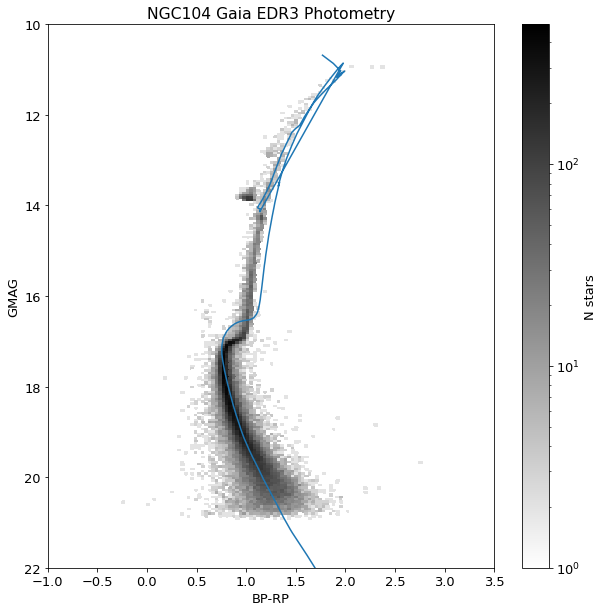

In [108]:
font = { 'size'   : 13}
mpl.rc('font', **font)
fig = plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(10,10))
plt.hist2d(data['BP']-data['RP'],data['GMAG'],bins=(200,200),norm = mpl.colors.LogNorm(),cmap='gray_r')
plt.plot(bestiso['GAIAEDR3_GBPMAG']-bestiso['GAIAEDR3_GRPMAG'],bestiso['GAIAEDR3_GMAG'])
plt.colorbar(label='N stars')
plt.xlabel('BP-RP')
plt.ylabel('GMAG')
plt.title('NGC104 Gaia EDR3 Photometry')
plt.xlim(-1,3.5)
plt.ylim(22,10)
plt.savefig('NGC104_cmd.png')
plt.show()